In [3]:
# Boston Housing Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
ds = pd.read_csv('Datum/CarPrice_Assignment.csv')
ds = ds.drop(['car_ID'], axis=1)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [6]:
ds

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [7]:
# Checking for null values
ds.isnull().sum()

# Dummy variables
ds = pd.get_dummies(ds, drop_first=True)

In [8]:
y = ds['price']
X = ds.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr = LinearRegression().fit(X_train, y_train)

IndexError: index 10 is out of bounds for axis 0 with size 10

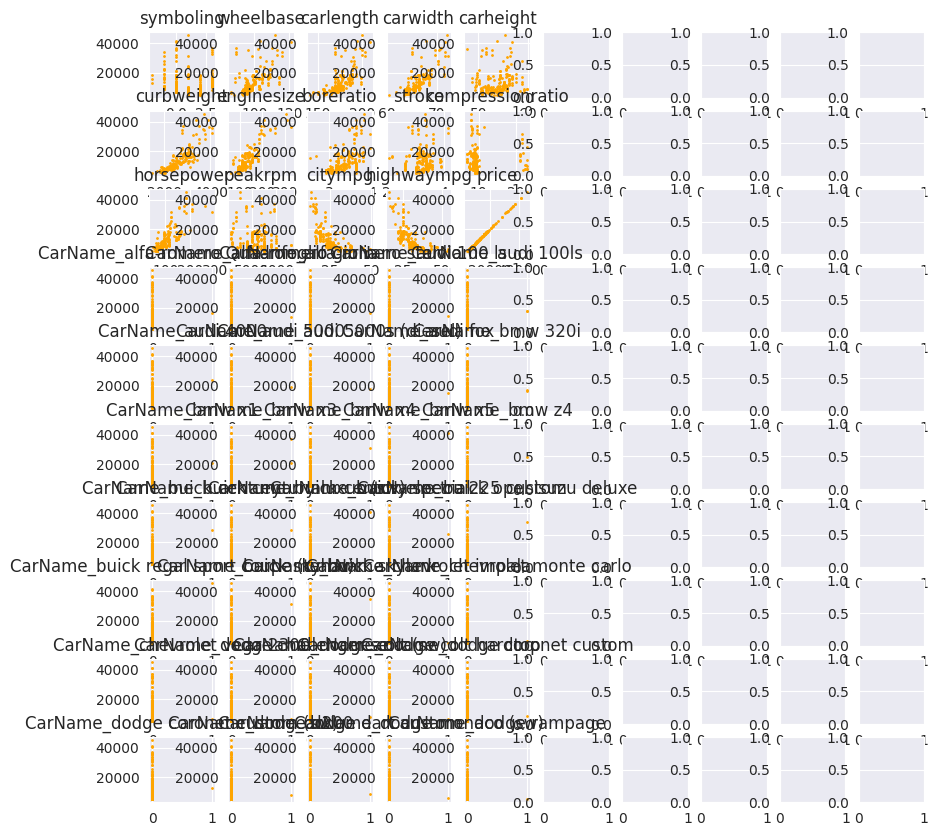

In [9]:
# Removing the id and date columns
fig, ax = plt.subplots(10, 10, figsize=(10, 10))

for i, col in enumerate(ds.columns):
    x = i // 5
    y = i % 5
    ax[x, y].scatter(ds[col], ds['price'], s=1, c='orange')
    ax[x, y].set_title(col)

plt.show()

In [ ]:
for i, col in enumerate(ds.columns):
    x = i // 4
    y = i % 4
    ax[x, y].scatter(ds[col], ds['price'], s=1, c='orange')
    ax[x, y].set_title(col)
plt.tight_layout()
plt.show()
ds.columns

In [ ]:
ds.columns

In [ ]:
!pip install seaborn --upgrade
import seaborn as sns
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(ds[['sqft_lot','sqft_above','price','sqft_living','bedrooms']],
                 hue='bedrooms', palette='tab20',size=6)
g.set(xticklabels=[]);

In [11]:
print("TRAINING ACCURACY: ", lr.score(X_train, y_train))
print("TESTING ACCURACY: ", lr.score(X_test, y_test))
print("DAMN THIS IS OVERFITTING")

TRAINING ACCURACY:  0.9994762412098087
TESTING ACCURACY:  0.6205833709620694
DAMN THIS IS OVERFITTING


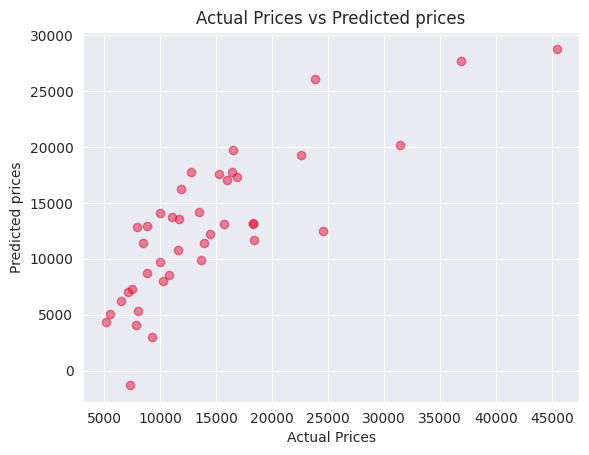

In [10]:
# Plotting out the model predictions versus the actual values as a line plot

y_pred = lr.predict(X_test)
plt.scatter(y_test, y_pred, c='crimson', alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted prices")
plt.show()


In [89]:
for i in range(len(y_test)):
    print(y_test.iloc[i], "|", y_pred[i], end="\n\n")

5195.0 | 10950.172103244786

19699.0 | 31307.719052250068

22625.0 | 13897.261868180256

17075.0 | 20255.630129020035

5399.0 | 4044.251376195356

11850.0 | 13672.057339016596

12945.0 | 327.428929806174

11549.0 | 6266.632095807465

15510.0 | 18288.33534262313

16695.0 | 18397.061161486534

18150.0 | 5280.642917347734

10795.0 | 14801.113891718713

7609.0 | 11608.971541168932

17710.0 | 26820.51920596674

18620.0 | 19721.089253894213

8949.0 | 9595.204973854576

21105.0 | 42417.28318919238

11248.0 | 11964.894994648697

12170.0 | 13644.51732597695

34184.0 | 31563.284826415213

18280.0 | 6816.246711310552

15998.0 | 16987.452334151585

12764.0 | 15394.959461386963

6189.0 | 8926.537356969744

8499.0 | 9152.260450452799

6795.0 | 10755.685549562808

10198.0 | 11537.291290576743

9988.0 | 10083.299104740421

18344.0 | 19336.459199185647

7898.0 | 7513.21910305538

11048.0 | 23433.09945554156

16500.0 | 30111.533554387563

31600.0 | 37603.097511236236

13860.0 | 19106.530723991847

7053.

NameError: name 'ds' is not defined